In [15]:
from torch.utils.data import DataLoader

from segment.data import IRCAD3D
from segment.data.utils import train_valid_split

import scipy.ndimage
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import matplotlib.pyplot as plt
%matplotlib notebook

In [16]:
data = IRCAD3D('/raid/scratch/hinklejd/3D-IRCADb1', 'bone')

In [17]:
train, test = train_valid_split(data)
trainloader = DataLoader(train, batch_size=1)

In [18]:
for idx, (data, mask) in enumerate(trainloader):                                
    print(f'Data: {data.shape}, Mask: {mask.shape}')

Data: torch.Size([1, 151, 512, 512]), Mask: torch.Size([1, 151, 512, 512])
Data: torch.Size([1, 139, 512, 512]), Mask: torch.Size([1, 139, 512, 512])
Data: torch.Size([1, 119, 512, 512]), Mask: torch.Size([1, 119, 512, 512])
Data: torch.Size([1, 260, 512, 512]), Mask: torch.Size([1, 260, 512, 512])
Data: torch.Size([1, 124, 512, 512]), Mask: torch.Size([1, 124, 512, 512])
Data: torch.Size([1, 111, 512, 512]), Mask: torch.Size([1, 111, 512, 512])
Data: torch.Size([1, 129, 512, 512]), Mask: torch.Size([1, 129, 512, 512])
Data: torch.Size([1, 225, 512, 512]), Mask: torch.Size([1, 225, 512, 512])
Data: torch.Size([1, 113, 512, 512]), Mask: torch.Size([1, 113, 512, 512])
Data: torch.Size([1, 155, 512, 512]), Mask: torch.Size([1, 155, 512, 512])
Data: torch.Size([1, 135, 512, 512]), Mask: torch.Size([1, 135, 512, 512])
Data: torch.Size([1, 124, 512, 512]), Mask: torch.Size([1, 124, 512, 512])
Data: torch.Size([1, 91, 512, 512]), Mask: torch.Size([1, 91, 512, 512])
Data: torch.Size([1, 125, 5

In [5]:
def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    p = p[:,:,::-1]
    
    verts, faces, _, _ = measure.marching_cubes(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

In [19]:
mask = mask.squeeze(0).numpy()
mask.shape

(132, 512, 512)

In [7]:
#plot_3d(mask)

In [8]:
data = data.squeeze(0).numpy()
data.shape

(139, 512, 512)

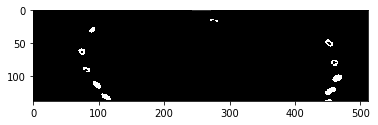

In [9]:
plt.imshow(mask[:,mask.shape[1]//2,:], cmap='gray')

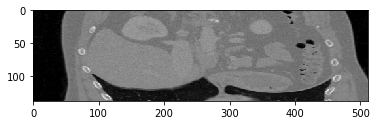

In [10]:
plt.imshow(data[:,data.shape[1]//2,:], cmap='gray')

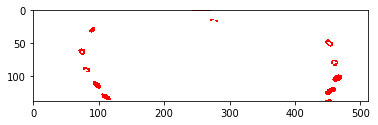

In [11]:
import matplotlib as mpl
sl=data.shape[1]//2
plt.imshow(data[:,sl,:], cmap='gray')
cm = mpl.colors.ListedColormap(['white','red'])
plt.imshow(mask[:,sl,:], cmap=cm)

In [20]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

<IPython.core.display.Javascript object>


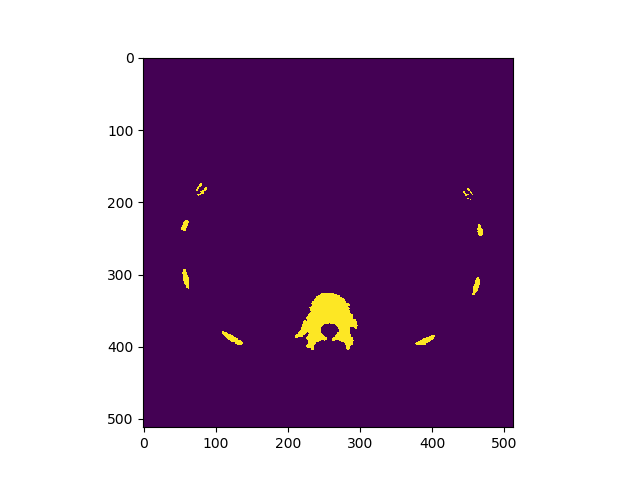

In [22]:
multi_slice_viewer(mask)